# Prediction of House Price

Yuxiang (Kevin) Hu, July 2020

## Executive Summary

The analysis is conducted on a given dataset of New Zealand houses' capital value. The dataset contains details of house composition and its environment including deprive index and population and location of suburb and statistical area 1

The analysis is based on 1043 distinct observations for each of the 15 numerical variables out of 17 variables collected. The fifth variable is capital value, abbr. CV which is the response variables with integer values.

The rest of the variables are explanatory variables and each describes a measurement or feature of the house. The eighth variable is ID for SA1 (statistical area 1). Column 9 to 14 represents numbers of occupents for each year group in its SA1. The sixteenth (second last) variable is deprive index for its SA1. All population and deprive index are based on 2018 census. The names of the rest variables are self-explanatory.

After exploration and brief calculation on statistics of data, and by creating visualization of each and the correlation between each numerical variables, three moderate positively correlated variables are found. Two linear regression models are tested for this dataset the the best model has been chosen on coefficient of determination

## Initial Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
dataset = pd.read_csv('prepared data.csv')

In [3]:
# drop index row which was created by to_csv in preparation of data
dataset = dataset.drop('Unnamed: 0', axis=1)

In [4]:
dataset.loc[dataset.isnull().any(axis=1)]

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,NZDep2018,URPopnSA1_2018,Population18


In [5]:
dataset.dtypes

Bedrooms            int64
Bathrooms           int64
Address            object
Land area           int64
CV                  int64
Latitude          float64
Longitude         float64
SA1                 int64
0-19 years          int64
20-29 years         int64
30-39 years         int64
40-49 years         int64
50-59 years         int64
60+ years           int64
Suburbs            object
NZDep2018         float64
URPopnSA1_2018      int64
Population18        int64
dtype: object

In [6]:
dataset.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,NZDep2018,URPopnSA1_2018,Population18
0,5,3,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,6.0,174,174
1,5,3,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,1.0,129,129
2,6,4,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,1.0,129,129
3,2,1,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,2.0,120,120
4,3,1,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,9.0,231,231


In [7]:
dataset.shape

(1043, 18)

All data are present.

There is no null or duplicate values after preparation of data in DataCollection.ipynb.

Data has correct data types.

The initial exploration of the data began with summary and descriptive statistics. Individual Feature Statistics Summary statistics are recorded in the following table for 1043 observations in 2018.

In [8]:
dataset.describe()

,Bedrooms,Bathrooms,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,NZDep2018,URPopnSA1_2018,Population18
count,1043.000000,1043.000000,1043.000000,1.043000e+03,1043.000000,1043.000000,1.043000e+03,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,3.780441,2.072867,850.817833,1.365014e+06,-36.893368,174.799023,7.006313e+06,47.542665,29.001918,27.025887,24.117929,22.599233,29.321189,5.064238,179.896453,179.896453
std,1.172592,0.993483,1579.533876,1.042246e+06,0.130153,0.119779,2.591174e+03,24.739116,21.082827,17.999262,10.964718,10.222875,21.873643,2.906194,71.199409,71.199409
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
25%,3.000000,1.000000,321.000000,7.800000e+05,-36.950183,174.719666,7.004413e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,2.000000,138.000000,138.000000
50%,4.000000,2.000000,570.000000,1.080000e+06,-36.893368,174.797892,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,5.000000,174.000000,174.000000
75%,4.000000,3.000000,825.000000,1.600000e+06,-36.855643,174.880944,7.008380e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,8.000000,208.500000,208.500000
max,17.000000,8.000000,22240.000000,1.250000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,10.000000,789.000000,789.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x24626478>,
      dtype=object)

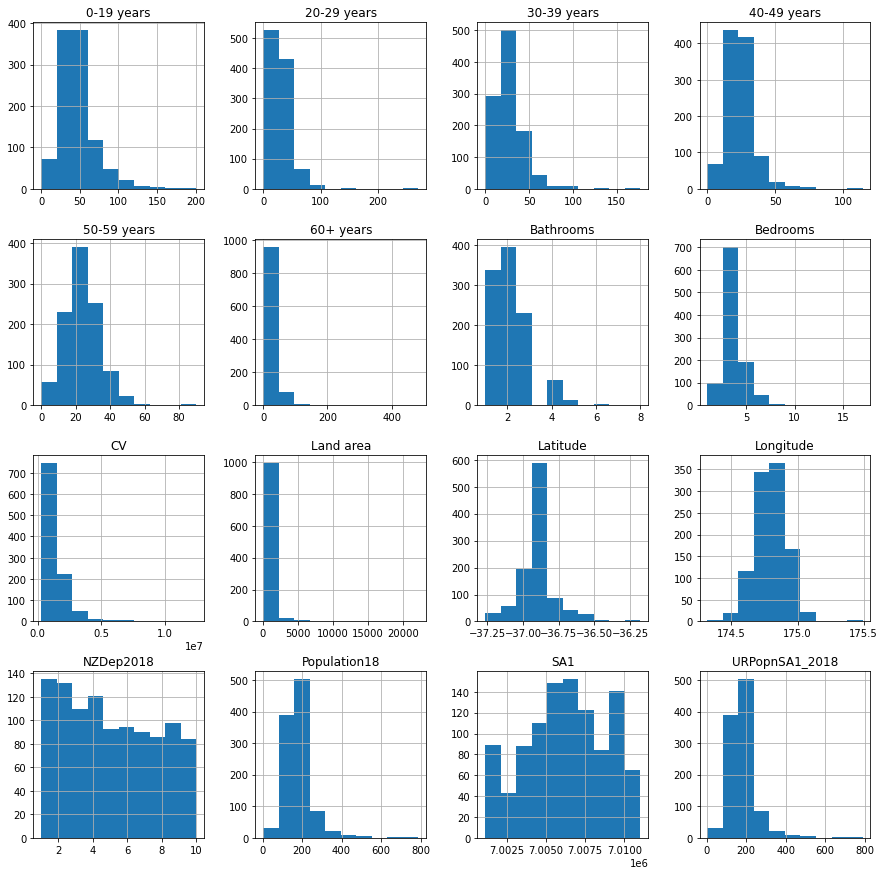

In [9]:
dataset.hist(figsize=(15,15))

In [10]:
# sns.pairplot(dataset)

# generated graph is too large from pairplot that causes the file size to exceed 25MB and cannot be uploaded to github.

### Correlation and Relationships

A table of coefficient of determination is generated as below where dark green means correlation value of 1 and brown means correlation value of -1.

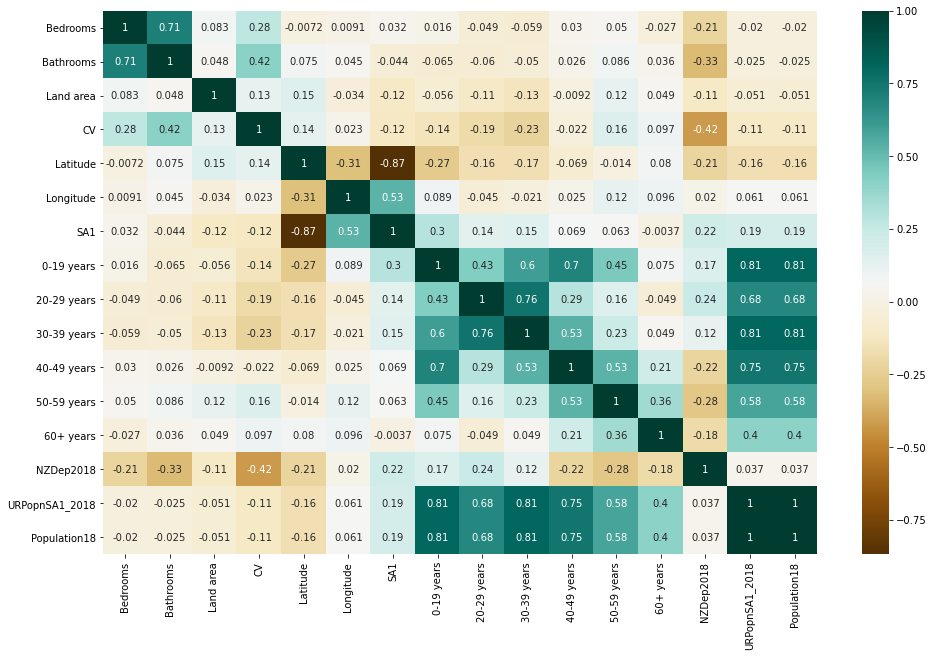

In [11]:
fig, ax = plt.subplots(figsize=(16,10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True,cmap="BrBG")

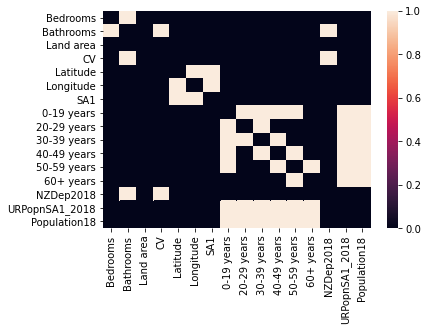

In [12]:
# display all block with moderate correlation that isn't with itself
sns.heatmap(correlation_matrix.apply(lambda x: (abs(x) > 0.3) & (x != 1) ))

It can be seen from either of the graphs above, that there is strong correlation between total population in each SA1 and individual age group and in between different age groups. There is also strong correlation between SA1 ID and lattitude. The capital value shows moderate positive correlation with number of bedrooms and bathrooms and deprive index.

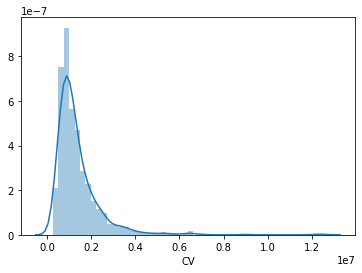

In [13]:
sns.distplot(dataset['CV'])
# CV values looks to be right skewed

The variable CV looks right skewed to a small extent. 

## Model fitted

### Direct linear regression model

A direct linear regression model will be fitted first. String variables including address and suburbs cannot be handled by a linear regression model and will be removed.

In [14]:
from sklearn.model_selection import train_test_split
x = dataset.drop(['CV', 'Address', 'Suburbs',], axis=1)
x.head()

,Bedrooms,Bathrooms,Land area,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,NZDep2018,URPopnSA1_2018,Population18
0,5,3,714,-37.012920,174.904069,7009770,48,27,24,21,24,21,6.0,174,174
1,5,3,564,-37.063672,174.922912,7009991,42,18,12,21,15,30,1.0,129,129
2,6,4,626,-37.063580,174.924044,7009991,42,18,12,21,15,30,1.0,129,129
3,2,1,65,-36.912996,174.787425,7007871,42,6,21,21,12,15,2.0,120,120
4,3,1,601,-36.979037,174.892612,7008902,93,27,33,30,21,33,9.0,231,231


In [15]:
y = dataset['CV']
y.head()

0     960000
1    1250000
2    1250000
3     740000
4     630000
Name: CV, dtype: int64

In [16]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
model.fit(train_x, train_y)

LinearRegression()

In [19]:
list(zip(x.columns,model.coef_))

[('Bedrooms', 6632.003592826238),
 ('Bathrooms', 353632.8984722144),
 ('Land area', 28.015867214970058),
 ('Latitude', -18026.05258814285),
 ('Longitude', 96696.83874230154),
 ('SA1', -13.098936293215957),
 ('0-19 years', 7881.026225626355),
 ('20-29 years', 9225.602139826275),
 ('30-39 years', -11650.605959668268),
 ('40-49 years', -3741.6764298794824),
 ('50-59 years', 13121.673515349534),
 ('60+ years', 4515.703404461486),
 ('NZDep2018', -111985.73896780952),
 ('URPopnSA1_2018', -2224.360890829061),
 ('Population18', -2224.3608908288284)]

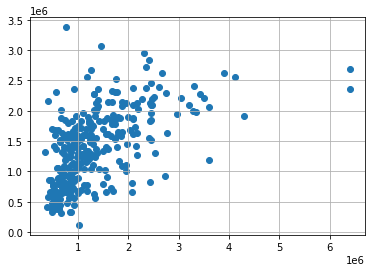

In [20]:
predicted = model.predict(test_x)
plt.grid(True)
plt.scatter(test_y,predicted,)
plt.show()


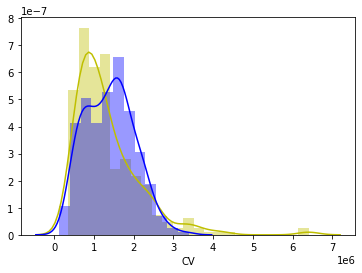

In [21]:
# yellow is tested, blue is predidcted
fig,ax = plt.subplots()
sns.distplot(test_y,ax=ax,color="y")
sns.distplot(predicted,ax=ax, color='b')
plt.show()

In [22]:
model.score(test_x,test_y)

0.278107502134476

Direct linear regression model explains 28% of variation in the data. 

The model tends to predict the majority of houses to be more expensive and might not be able to predict expensive houses as there is no prediction of capital value above $400000 in the test data set (30% of full data set). The model may predict capital value close to or below zero when a large number of predictions is required.

### Linear regression model with transformed response variable

The value of response variable Capital Value will be transformed by log base 10 for model fitting purposes and would be transformed back for interpretation.

In [23]:
import math
dataset['CV'] = dataset['CV'].apply(math.log10)


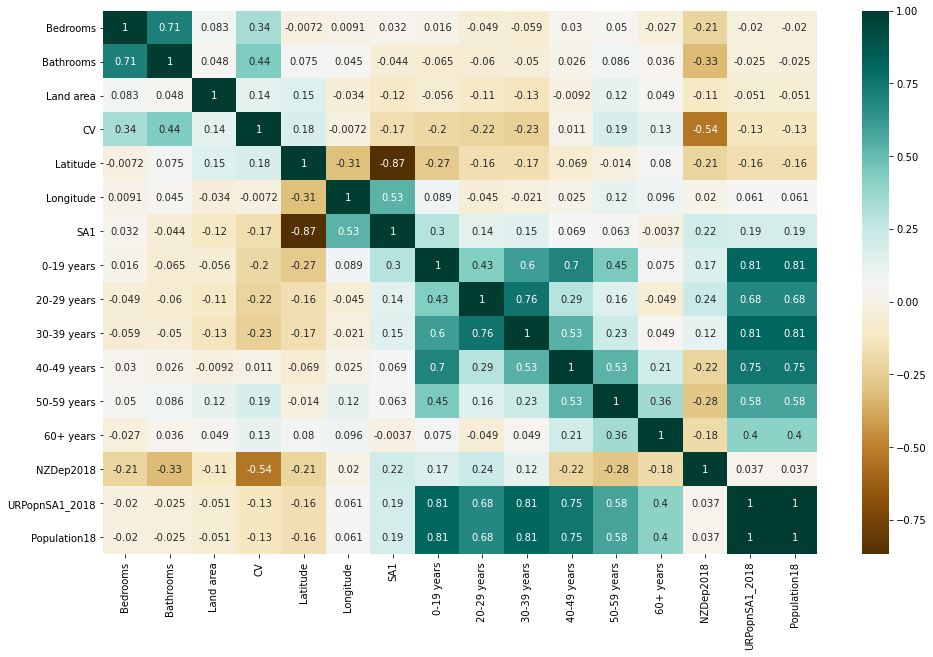

In [24]:
fig, ax = plt.subplots(figsize=(16,10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True,cmap="BrBG")

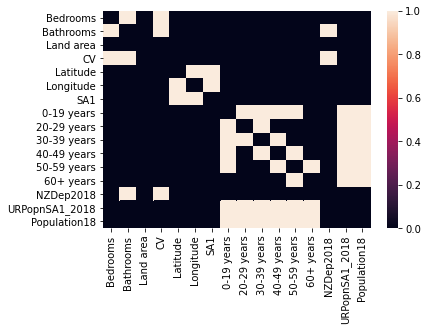

In [25]:
# display all block with strong correlation that isn't with itself
sns.heatmap(correlation_matrix.apply(lambda x: (abs(x) > 0.3) & (x != 1) ))

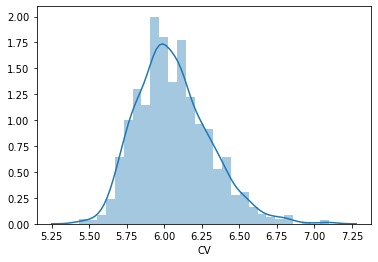

In [26]:
sns.distplot(dataset['CV'])

Only the same three variables including number of bedrooms and bathrooms and land area show moderate positive correlation with capital value although all three coefficients of determination increases. 

The capital value after transformation is approximately normal.

In [27]:
x = dataset.drop(['CV', 'Address', 'Suburbs'], axis=1)
x.head()

,Bedrooms,Bathrooms,Land area,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,NZDep2018,URPopnSA1_2018,Population18
0,5,3,714,-37.012920,174.904069,7009770,48,27,24,21,24,21,6.0,174,174
1,5,3,564,-37.063672,174.922912,7009991,42,18,12,21,15,30,1.0,129,129
2,6,4,626,-37.063580,174.924044,7009991,42,18,12,21,15,30,1.0,129,129
3,2,1,65,-36.912996,174.787425,7007871,42,6,21,21,12,15,2.0,120,120
4,3,1,601,-36.979037,174.892612,7008902,93,27,33,30,21,33,9.0,231,231


In [28]:
y = dataset['CV']
y.head()

0    5.982271
1    6.096910
2    6.096910
3    5.869232
4    5.799341
Name: CV, dtype: float64

In [29]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.3, random_state = 42)
model = LinearRegression()
model.fit(train_x,train_y)
list(zip(x.columns,model.coef_))

[('Bedrooms', 0.03304194437259184),
 ('Bathrooms', 0.048426834858234465),
 ('Land area', 2.7145117694749032e-06),
 ('Latitude', -0.03933916965529281),
 ('Longitude', 0.017774277654862163),
 ('SA1', -5.4759413291860515e-06),
 ('0-19 years', 0.00026645505141771803),
 ('20-29 years', 0.0017996220488152833),
 ('30-39 years', -0.0018749226921119632),
 ('40-49 years', 0.0009283196814485106),
 ('50-59 years', 0.003748703070089748),
 ('60+ years', 0.0011164577471639645),
 ('NZDep2018', -0.031173601921800815),
 ('URPopnSA1_2018', -0.00047889228574584937),
 ('Population18', -0.00047889228574580773)]

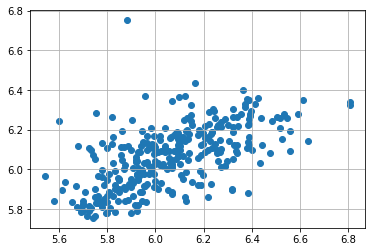

In [30]:
predicted = model.predict(test_x)
plt.grid(True)
plt.scatter(test_y,predicted)
plt.show()

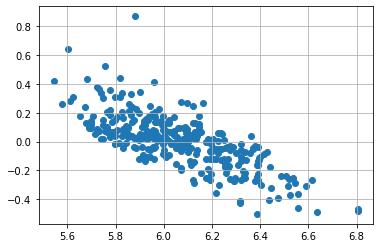

In [31]:
# show difference against true values across the range of CV
# the x-axis is in million of dollars worth of capital value of true record
# the y-axis is the difference between true and predicted capital value in log base 10 scale.
predicted = model.predict(test_x)
plt.grid(True)
plt.scatter(test_y,predicted-test_y)
plt.show()

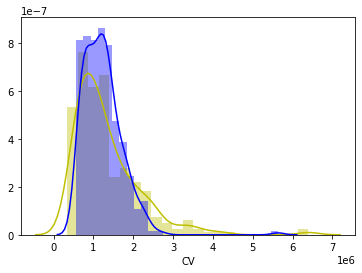

In [32]:
# yellow is tested, blue is predidcted
fig,ax = plt.subplots()
sns.distplot(10**test_y,ax=ax,color="y")
sns.distplot(10**predicted,ax=ax, color='b')
plt.show()

In [33]:
model.score(test_x,test_y)

0.36267698594070064

The linear regression model with transformed response variable explains 36% of variation in the data.

The best fit curve demonstrate a reasonable range and a right-skewed shape. A value very close to or below zero is unlikely to occur in future predictions and the model is able to predict expensive models to a certain extent but is more likely to predict a value much closer to median. 

The prediction has less spread than expected.

## Conclusion

The linear regression model with transformed response variable is the best model of the two already analysised. It explains 36% of variation in the test data.